# Introducción a Pandas

En este notebook doy los primeros pasos para entender el funcionamiento de la biblioteca _Pandas_. 

NB hecho por **Nico Quijada**

In [2]:
import pandas as pd
import numpy as np

_Series_ es una estructura de datos. En este caso guardamos un solo tipo de número. 

In [2]:
#La primera estructura de datos

una_serie = pd.Series([10, 20, 12, 0.4])

Tiene propiedad _nombre_

In [3]:
una_serie.name = "Una serie"

El tipo de datos que estamos guardando

In [4]:
una_serie.dtype

dtype('float64')

Podemos imprimir los valores

In [5]:
una_serie.values

array([10. , 20. , 12. ,  0.4])

In [6]:
una_serie

0    10.0
1    20.0
2    12.0
3     0.4
Name: Una serie, dtype: float64

Tenemos índices

In [7]:
una_serie[1]

20.0

Podemos modificar de manera arbitraria cuáles son los índices:

In [8]:
una_serie.index = [
    "Primero",
    "Segundo",
    "Tercero",
    "Cuarto"
]

In [9]:
una_serie

Primero    10.0
Segundo    20.0
Tercero    12.0
Cuarto      0.4
Name: Una serie, dtype: float64

Aunque parece un diccionario, no lo es. Esta estructura de datos sí está ordenada y tenemos la ventaja de tener _keys_ para las entradas. Más aún, podemos crearlo desde el inicio y de manera directa.

In [11]:
otra = pd.Series({"Yo": 1, "Tú": 2, "Él": 3}, name = "Tres pronombres")

In [12]:
print(otra)

Yo    1
Tú    2
Él    3
Name: Tres pronombres, dtype: int64


In [13]:
mas = pd.Series(["esta", "es", "una", "oración"], index = [1, 2, 3, 4], name = "Oración")

In [14]:
print(mas)

1       esta
2         es
3        una
4    oración
Name: Oración, dtype: object


In [16]:
mas[1]

'esta'

Podemos obtener los elementos de acuerdo con su ubicación en el objeto. También podemos pasar múltiples índices o locaciones.

In [19]:
mas.iloc[[-1, 0]]

4    oración
1       esta
Name: Oración, dtype: object

Con pandas también podemos cortar nuestros objetos pero aquí _sí_ consideramos el límite superior de nuestra serie.

In [28]:
otra["Yo": "Él"]

Yo    1
Tú    2
Él    3
Name: Tres pronombres, dtype: int64

Podemos realizar operaciones sobre las series

In [30]:
#Definimos una serie de millones de habitantes

g7_pop = pd.Series({"Canada": 35.467, 
                    "Francia": 63.951, 
                    "Alemania": 80.940, 
                    "Italia": 60.665, 
                    "Japón": 127.061, 
                    "Reino Unido": 64.511, 
                    "Estados Unidos": 318.523}, 
                     name = "Poblaciones del G7 en millones")

Multiplicamos por un millón

In [31]:
g7_pop * 1_000_000

Canada             35467000.0
Francia            63951000.0
Alemania           80940000.0
Italia             60665000.0
Japón             127061000.0
Reino Unido        64511000.0
Estados Unidos    318523000.0
Name: Poblaciones del G7 en millones, dtype: float64

## Operaciones booleanas

In [33]:
g7_pop > 70

#Obtenemos cuáles son los países que tienen más de 70 millones de habitantes

Canada            False
Francia           False
Alemania           True
Italia            False
Japón              True
Reino Unido       False
Estados Unidos     True
Name: Poblaciones del G7 en millones, dtype: bool

In [34]:
#Podemos seleccionar con booleanos

g7_pop[g7_pop > 70]

Alemania           80.940
Japón             127.061
Estados Unidos    318.523
Name: Poblaciones del G7 en millones, dtype: float64

In [35]:
g7_pop.mean()

107.30257142857144

In [36]:
g7_pop[g7_pop > 70]

Alemania           80.940
Japón             127.061
Estados Unidos    318.523
Name: Poblaciones del G7 en millones, dtype: float64

Tenemos operadores booleanos:

- ~ significa _no_
- | significa _o_
- & significa _y_

In [39]:
g7_pop[(g7_pop > g7_pop.mean()) | (g7_pop < g7_pop.mean()/2)]

#Esta celda nos da cuáles son los países que quedan por encima de la media o bien, que quedan por debajo de la mitad 
#de la media

Canada             35.467
Japón             127.061
Estados Unidos    318.523
Name: Poblaciones del G7 en millones, dtype: float64

## Operaciones

También podemos realizar operaciones sobre los datos 

media, logaritmo, desviación estándar y otras funciones tradicionales de numpy

In [41]:
#También podemos modificar las series

g7_pop["Canada"] = 40.5
g7_pop.iloc[-1] = 500

In [42]:
g7_pop

Canada             40.500
Francia            63.951
Alemania           80.940
Italia             60.665
Japón             127.061
Reino Unido        64.511
Estados Unidos    500.000
Name: Poblaciones del G7 en millones, dtype: float64

In [45]:
g7_pop[g7_pop < 70] = 99.99

#También podemos modificar los valores utilizando los booleanos

In [44]:
g7_pop

Canada             99.990
Francia            99.990
Alemania           80.940
Italia             99.990
Japón             127.061
Reino Unido        99.990
Estados Unidos    500.000
Name: Poblaciones del G7 en millones, dtype: float64

## Dataframe

Es básicamente lo mismo que un documento de excel. 

In [27]:
#Definición de las columnas
pob = [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523]
pib = [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ]
sup = [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ]
idh = [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ]
cont = ["América",
        "Europa",
        "Europa",
        "Europa",
        "Asia",
        "Europa",
        "América"]

Creación del DataFrame

In [26]:
df = pd.DataFrame({
    "Población": pob,
    "PIB" : pib,
    "Superficie" :sup,
    "IDH": idh,
    "Continente": cont
}
)

In [29]:
print(df)

   Población       PIB  Superficie    IDH Continente
0     35.467   1785387     9984670  0.913    América
1     63.951   2833687      640679  0.888     Europa
2     80.940   3874437      357114  0.916     Europa
3     60.665   2167744      301336  0.873     Europa
4    127.061   4602367      377930  0.891       Asia
5     64.511   2950039      242495  0.907     Europa
6    318.523  17348075     9525067  0.915    América


Un dataframe puede ser pensado como una colección de series

In [30]:
df.index = [
    "Canada",
    "Francia",
    "Alemania",
    "Italia",
    "Japón",
    "Reino unido",
    "Estados unidos"
    
]

In [32]:
print(df.columns)
print(df.index)
df.info()

Index(['Población', 'PIB', 'Superficie', 'IDH', 'Continente'], dtype='object')
Index(['Canada', 'Francia', 'Alemania', 'Italia', 'Japón', 'Reino unido',
       'Estados unidos'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to Estados unidos
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Población   7 non-null      float64
 1   PIB         7 non-null      int64  
 2   Superficie  7 non-null      int64  
 3   IDH         7 non-null      float64
 4   Continente  7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [33]:
df.size

35

In [35]:
df.shape

(7, 5)

In [38]:
#Nos da un resumen por cada columna numérica. Los porcentajes son percentiles
df.describe()

,Población,PIB,Superficie,IDH
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [42]:
df.dtypes

Población     float64
PIB             int64
Superficie      int64
IDH           float64
Continente     object
dtype: object

In [44]:
#Nos da cuántas columnas de cada tipo de datos
df.dtypes.value_counts()

float64    2
int64      2
object     1
dtype: int64

## Slicing, indexing y selección

In [47]:
#Selección por filas
df.loc["Canada"]

Población      35.467
PIB           1785387
Superficie    9984670
IDH             0.913
Continente    América
Name: Canada, dtype: object

In [48]:
#Selección por posición
df.iloc[-1]

Población      318.523
PIB           17348075
Superficie     9525067
IDH              0.915
Continente     América
Name: Estados unidos, dtype: object

In [54]:
#Selección por columna
res = df["Población"]
print(res, type(res))

Canada             35.467
Francia            63.951
Alemania           80.940
Italia             60.665
Japón             127.061
Reino unido        64.511
Estados unidos    318.523
Name: Población, dtype: float64 <class 'pandas.core.series.Series'>


In [55]:
#La serie puede ser presentada como un DataFrame
res.to_frame()

,Población
Canada,35.467
Francia,63.951
Alemania,80.940
Italia,60.665
Japón,127.061
Reino unido,64.511
Estados unidos,318.523


In [56]:
#Podemos seleccionar varias columnas con una lista

df[["Población", "IDH"]]

,Población,IDH
Canada,35.467,0.913
Francia,63.951,0.888
Alemania,80.940,0.916
Italia,60.665,0.873
Japón,127.061,0.891
Reino unido,64.511,0.907
Estados unidos,318.523,0.915


In [67]:
#El slicing trabaja a nivel de columna (recorta en las filas y llama a las columnas)

df[0:1] #No toma el cuenta el límite superior

,Población,PIB,Superficie,IDH,Continente
Canada,35.467,1785387,9984670,0.913,América


In [74]:
df.loc["Canada": "Alemania"]

,Población,PIB,Superficie,IDH,Continente
Canada,35.467,1785387,9984670,0.913,América
Francia,63.951,2833687,640679,0.888,Europa
Alemania,80.940,3874437,357114,0.916,Europa


In [79]:
df.loc[["Canada", "Francia"], "PIB"] #Cuando es loc el segundo argumento nos da la columna que deseamos

Canada     1785387
Francia    2833687
Name: PIB, dtype: int64

In [70]:
df.loc["Canada":"Alemania", ["PIB", "Continente"]] #De esta manera sí se toma en cuenta el límite superior

,PIB,Continente
Canada,1785387,América
Francia,2833687,Europa
Alemania,3874437,Europa


## Selección condicional (como en Series)

In [80]:
df["Población"] > 70

Canada            False
Francia           False
Alemania           True
Italia            False
Japón              True
Reino unido       False
Estados unidos     True
Name: Población, dtype: bool

In [82]:
df.loc[df["Población"]>70, ["Población", "IDH"]]

,Población,IDH
Alemania,80.940,0.916
Japón,127.061,0.891
Estados unidos,318.523,0.915


Dropping quita las filas o columnas especificadas y hacer esto no cambia el dataframe. Los dataframes son inmutables con este método y con la mayoría de los existentes.

In [91]:
df.drop(["Francia", "Canada", "Italia"])

,Población,PIB,Superficie,IDH,Continente
Alemania,80.940,3874437,357114,0.916,Europa
Japón,127.061,4602367,377930,0.891,Asia
Reino unido,64.511,2950039,242495,0.907,Europa
Estados unidos,318.523,17348075,9525067,0.915,América


## Operaciones

Cosas que podemos hacer

In [92]:
crisis = pd.Series([-1_000_000, -0.3], index = ["PIB", "IDH"])
crisis

PIB   -1000000.0
IDH         -0.3
dtype: float64

In [93]:
df[["PIB", "IDH"]] 

,PIB,IDH
Canada,1785387,0.913
Francia,2833687,0.888
Alemania,3874437,0.916
Italia,2167744,0.873
Japón,4602367,0.891
Reino unido,2950039,0.907
Estados unidos,17348075,0.915


In [96]:
df[["PIB", "IDH"]] + crisis #Combinando las dos columnas que están alineadas aunque no encajen las filas (se multiplican)

,PIB,IDH
Canada,785387.0,0.613
Francia,1833687.0,0.588
Alemania,2874437.0,0.616
Italia,1167744.0,0.573
Japón,3602367.0,0.591
Reino unido,1950039.0,0.607
Estados unidos,16348075.0,0.615


## Modificar el DF

Podemos agregar columnas con serires

In [97]:
idiomas = pd.Series(
    {"Francia" : "Francés",
    "Alemania": "Alemán",
    "Italia": "Italiano"},
    name = "Idioma"
)

In [100]:
df["Idioma"] = idiomas

In [101]:
df

,Población,PIB,Superficie,IDH,Continente,Idioma
Canada,35.467,1785387,9984670,0.913,América,NaN
Francia,63.951,2833687,640679,0.888,Europa,Francés
Alemania,80.940,3874437,357114,0.916,Europa,Alemán
Italia,60.665,2167744,301336,0.873,Europa,Italiano
Japón,127.061,4602367,377930,0.891,Asia,NaN
Reino unido,64.511,2950039,242495,0.907,Europa,NaN
Estados unidos,318.523,17348075,9525067,0.915,América,NaN


Podemos cambiar toda una columna igualándola a un valor.
Casi siempre vamos a modificar un DF cuando tenemos un operador "=" en nuestra operación.

In [104]:
df.rename(
    columns = {"Población":"Populación"}
)

#Esto no altera el DF original

,Populación,PIB,Superficie,IDH,Continente,Idioma
Canada,35.467,1785387,9984670,0.913,América,NaN
Francia,63.951,2833687,640679,0.888,Europa,Francés
Alemania,80.940,3874437,357114,0.916,Europa,Alemán
Italia,60.665,2167744,301336,0.873,Europa,Italiano
Japón,127.061,4602367,377930,0.891,Asia,NaN
Reino unido,64.511,2950039,242495,0.907,Europa,NaN
Estados unidos,318.523,17348075,9525067,0.915,América,NaN


## Creando columnas con las columnas existentes

In [109]:
df["PIB/Cap/10"] = df["PIB"]/df["Población"]/1000

In [110]:
df

,Población,PIB,Superficie,IDH,Continente,Idioma,PIB/Cap,PIB/Cap/10
Canada,35.467,1785387,9984670,0.913,América,NaN,50.339386,50.339386
Francia,63.951,2833687,640679,0.888,Europa,Francés,44.310284,44.310284
Alemania,80.940,3874437,357114,0.916,Europa,Alemán,47.868013,47.868013
Italia,60.665,2167744,301336,0.873,Europa,Italiano,35.733026,35.733026
Japón,127.061,4602367,377930,0.891,Asia,NaN,36.221712,36.221712
Reino unido,64.511,2950039,242495,0.907,Europa,NaN,45.729240,45.729240
Estados unidos,318.523,17348075,9525067,0.915,América,NaN,54.464120,54.464120


## Lectura de datos

In [118]:
DF = pd.read_csv('btc-market-price.csv', header = None)

In [119]:
DF.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [121]:
DF.columns = ["Timestamp", "Price"]

In [122]:
DF.shape

(365, 2)

In [123]:
DF.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [125]:
DF.tail(10)

,Timestamp,Price
355,2018-03-23 00:00:00,8686.826667
356,2018-03-24 00:00:00,8662.378333
357,2018-03-25 00:00:00,8617.296667
358,2018-03-26 00:00:00,8197.548333
359,2018-03-27 00:00:00,7876.195000
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [127]:
DF.dtypes

Timestamp     object
Price        float64
dtype: object

In [128]:
pd.to_datetime(DF["Timestamp"]).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [129]:
DF["Timestamp"] = pd.to_datetime(DF["Timestamp"])

In [131]:
DF.set_index("Timestamp", inplace = True)

In [132]:
DF.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [133]:
DF.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


Podemos graficar

<AxesSubplot:xlabel='Timestamp'>

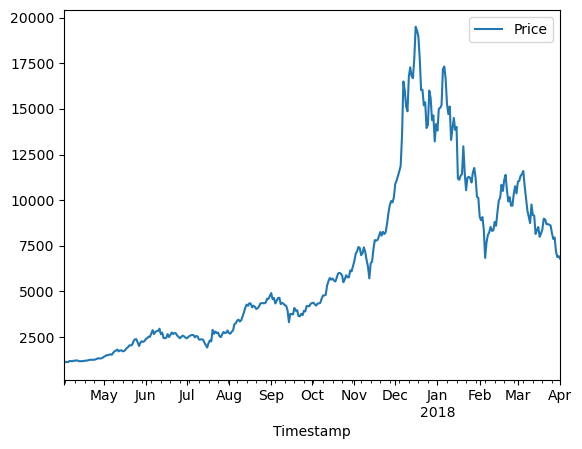

In [134]:
DF.plot()